In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
# Dataset 1 (Ramen Ratings)

In [6]:
ramen_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
ramen_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [7]:
ramen_rater.sample(10)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1023,1677,Paldo,Raobokki Noodle (Export Version),Pack,South Korea,5,NaN
1251,1449,Nissin,Cup Noodles Seafood Curry Flavour,Cup,Singapore,4,NaN
234,2466,Sau Tao,Instant Noodle King Pepper Duck Flavour Soup,Pack,Hong Kong,4,NaN
1817,883,Yamachan,Shio Ramen Seafood Mild,Pack,United States,4.5,NaN
1861,839,CJ CheilJedang,Mild Bean Curd Stew,Cup,South Korea,2,NaN
2468,232,Indomie,Mi Goreng Jumbo Beef,Pack,Indonesia,5,NaN
153,2547,Sichuan Guangyou,Chongqing Spicy Hot Noodles,Bowl,China,4,NaN
1889,811,Mr. Noodles,Vegetable,Pack,Canada,1.75,NaN
2083,617,Nissin,Demae Iccho Sesame Oil Chicken Macaroni,Pack,Japan,3.75,NaN
5,2695,Wei Lih,GGE Ramen Snack BBQ Cube,Pack,Taiwan,4,NaN


In [8]:
ramen_rater["Top Ten"].value_counts()

\n          4
2016 #10    1
2012 #10    1
2014 #1     1
2013 #1     1
2013 #2     1
2013 #4     1
2013 #9     1
2013 #3     1
2012 #7     1
2016 #1     1
2012 #5     1
2012 #3     1
2012 #6     1
2012 #9     1
2012 #1     1
2012 #2     1
2013 #6     1
2014 #6     1
2014 #5     1
2014 #8     1
2014 #10    1
2016 #8     1
2016 #5     1
2016 #9     1
2016 #7     1
2015 #10    1
2015 #7     1
2015 #4     1
2015 #9     1
2015 #6     1
2015 #1     1
2013 #10    1
2015 #8     1
2014 #7     1
2014 #4     1
2014 #9     1
2012 #4     1
Name: Top Ten, dtype: int64

In [9]:
tops = ramen_rater[[type(x)is str for x in ramen_rater["Top Ten"]]]
tops[["2015" in x for x in tops["Top Ten"]]]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
1083,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
1115,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9
1192,1508,Mamee,Chef Gold Recipe Mi Kari Seribu Rasa,Pack,Malaysia,5,2015 #6
1200,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5,2015 #1
1234,1466,Mama,Oriental Style Instant Noodles Green Curry Fla...,Pack,Thailand,5,2015 #8


In [113]:
#wordcloud plot 
Text = ramen_rater['Variety'].sample(300)
Text.head()



1385                      Chicken Flavour Instant Noodles
1396    Demae Ramen Shoyu Tonkotsu Artificial Pork Fla...
2238                                     Top Ramen Shrimp
1007                 Instant Noodles coconut Milk Flavour
639           Dried Mix Noodles Scallop Seafood Flavoured
Name: Variety, dtype: object

In [91]:
list_of_variety = Text.to_list()
print(list_of_variety)


['Penang Hokkien Prawn Noodle (New Improved Taste)', 'Sedaaap Mi Kuah Rasa Kari Ayam', 'Tachia Dried Noodles - Fried Shallot', 'Ippei-Chan Jumbo Night Market Style Yakisoba', 'Pow Crunch Teriyaki', 'Pollen Noodles Sesame Sauce & Soy Sauce', 'Demae Iccho Tonkotsu Flavour Instant Noodle', 'Ramen Pork Flavor', 'Tom Yam Instant Noodles', 'Instant Rice Vermicelli Original Flavour', 'Chongqing Noodles Spicy Hot Flavor', 'Tom Yum Rice Noodles', 'RapiFideo Sabor A Tomate Y Pollo', 'Ramen Japanese Style Quick-Cooking Alimentary Paste With Chicken Artificially Flavored Soup Base', 'Tonkotsu-Shoyu Rich Pork Flavor\xa0Ramen', 'Instant Cup Mi Goreng', 'Jjamppong Seafood Noodle King Bowl', 'Chef Creamy Tom Yam Flavour', 'Artificial Beef Flavor', 'Instant Noodle Instant Noodle Chicken Flavour', 'Demae Ramen Bar Noodle Hokkaido Miso Tonkotsu Flavour Instant Noodle', 'Premium Instant Noodles Spicy Beef Flavour', 'Zan Vegetarian Instant Noodle Series Shiitake Mushroom Flavour', 'Mie Sambal Goreng', 'Bee

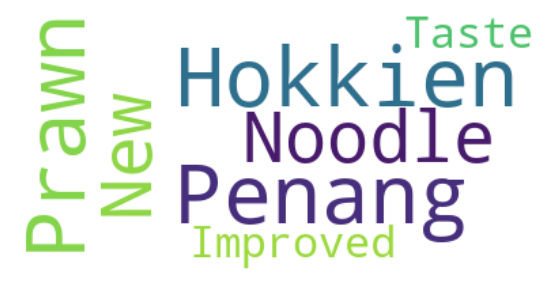

In [118]:
words = list_of_variety[0]
wordcloud = WordCloud(max_font_size=60,min_word_length=0, min_font_size=12, max_words=100,background_color="white",).generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [11]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [12]:
ramen_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
ramen_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [13]:
ramen_demands.set_index("Countries/Region", inplace=True)


In [14]:
ramen_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


<AxesSubplot:xlabel='Countries/Region'>

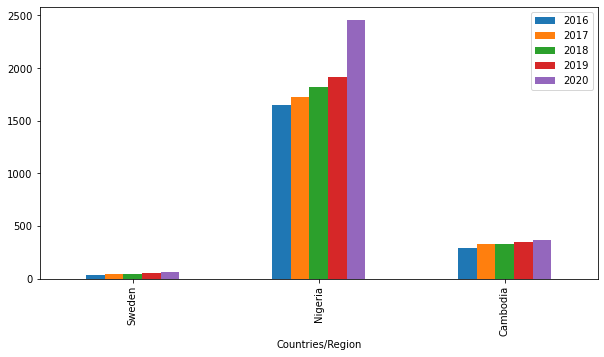

In [15]:
group_5 =ramen_demands.sample(3)
group_5.plot(kind="bar")
